In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import sklearn
import seaborn as sns

df = pd.read_csv('drive/MyDrive/movie.csv')
print(df.head())


                      Title   Genre  Release Year  Rating
0  The Shawshank Redemption   Drama          1994     9.3
1             The Godfather   Crime          1972     9.2
2           The Dark Knight  Action          2008     9.0
3              Pulp Fiction   Crime          1994     8.9
4                Fight Club   Drama          1999     8.8


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         58 non-null     object 
 1   Genre         58 non-null     object 
 2   Release Year  58 non-null     int64  
 3   Rating        58 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ KB
None


In [5]:
df = df.drop_duplicates()

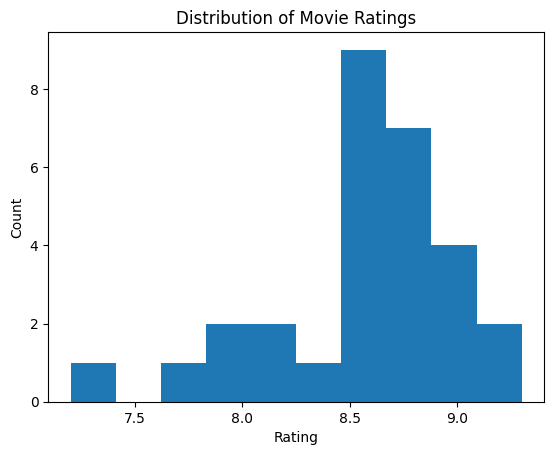

In [6]:
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


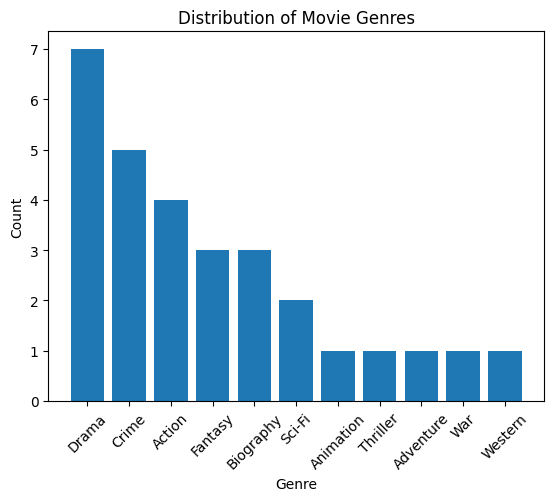

In [7]:
genre_counts = df['Genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45)
plt.show()


In [8]:
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating}")

Mean Rating: 8.55
Median Rating: 8.6


In [18]:
ground_truth = [1, 2, 3, 4, 5]  # Example: User's actual liked movies
recommended_movies = [1, 3, 5, 6, 7]  # Example: Recommended movies

precision = len(set(recommended_movies).intersection(ground_truth)) / len(recommended_movies)
recall = len(set(recommended_movies).intersection(ground_truth)) / len(ground_truth)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.60
Recall: 0.60


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('drive/MyDrive/movie.csv')

# Convert the 'Genre' column to a string representation
df['Genre'] = df['Genre'].astype(str)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the genre strings into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(df['Genre'])

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on a given movie title
def get_movie_recommendations(title, cosine_sim_matrix, df):
    # Get the index of the movie that matches the title
    movie_index = df[df['Title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with the given movie
    similarity_scores = list(enumerate(cosine_sim_matrix[movie_index]))

    # Sort movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 most similar movies
    top_movies_indices = [i[0] for i in similarity_scores[1:6]]
    top_movies = df['Title'].iloc[top_movies_indices]

    return top_movies

# Example usage
movie_title = 'The Dark Knight'
recommendations = get_movie_recommendations(movie_title, cosine_sim_matrix, df)
print(f"Recommended movies for '{movie_title}':")
print(recommendations)


Recommended movies for 'The Dark Knight':
7          The Matrix
17       The Avengers
19          Gladiator
31    The Dark Knight
36         The Matrix
Name: Title, dtype: object


In [19]:
!git init


Initialized empty Git repository in /content/.git/


In [20]:
!git add .
!git commit -m "Initial commit"


error: open("drive/MyDrive/German sample paper 7-10.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/German sample paper 7-10.gdoc'
fatal: adding files failed

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@f777616b69c6.(none)')
